In [1]:
# Search for the best model parameters and Cross-validation of the model 

In [2]:
# VIII : Search for the best model parameters

In [3]:
# Importing the library

# VIII - 1 : Importing of the librairy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
from keras.models import Sequential, Model,load_model
from keras.layers import Dropout,Dense
from keras import Input,layers
from keras.layers import LSTM, GRU,Bidirectional
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping,ReduceLROnPlateau
from tensorflow.python.keras.optimizers import TFOptimizer

In [4]:
# VIII - 2 : Importing of the dataset

In [5]:
dataset=pd.read_csv("https://raw.githubusercontent.com/oreilly-mlsec/book-resources/599669c7124dffb65ea7f6e0b7626df32496b1d6/chapter3/datasets/cpu-utilization/cpu-full-b.csv", sep=",")

In [6]:
# VIII - 3: split of data Test & Training

#  Size the data Test, Training
train_size=int(len(dataset)*.85)
test_size=int(len(dataset)*.15)
x_trainning,x_testing=dataset.iloc[0:train_size],dataset.iloc[(train_size+1):(train_size+test_size)]

In [7]:
# VIII - 4 : Preparing data for timesteps (lags)

def normalisationPreparationDonnee(data,lags):
    data=data['cpu'].values
    sc = MinMaxScaler(feature_range = (0, 1))
    #sc=StandardScaler()
    data1= data.reshape(-1,1)
    data2 = sc.fit_transform(data1)
    def preparation_data():
        x_train = []
        y_train = []
        for i in range(lags,len(data2)):
            x_train.append(data2[i-lags:i, 0])
            y_train.append(data2[i, 0])
        return np.array(x_train), np.array(y_train)
    x_train, y_train = preparation_data()
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train


In [8]:
# VIII - 5 :Application

lags=5

x_train, y_train = normalisationPreparationDonnee(x_trainning, lags)
x_test, y_test = normalisationPreparationDonnee(x_testing, lags)


In [9]:
# VIII - 6 : Search for the best model parameters (optimizer,Epochs, batch_size)

In [10]:

start=time()

def build_ConvNet1DBidir_OP_Par(optimizer):
    modelConvNet1DBidirectOP = Sequential()
    modelConvNet1DBidirectOP.add(Conv1D(128, kernel_size=1,activation='tanh',input_shape=(x_train.shape[1], 1)))
    modelConvNet1DBidirectOP.add(Conv1D(100, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))
    modelConvNet1DBidirectOP.add(Conv1D(100, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(Conv1D(128, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 100,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 64,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 32,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 64,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 100,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 128)))
    modelConvNet1DBidirectOP.add(Dense(units = 1))
    modelConvNet1DBidirectOP.compile(loss = 'mean_squared_error',
                      metrics=['acc'])     
    return modelConvNet1DBidirectOP

model=KerasRegressor(build_fn=build_ConvNet1DBidir_OP_Par,verbose=0)
parameters={"optimizer":['adam','rmsprop'],
            "epochs":[150,300,500],
            "batch_size":[1,5,10]
            }

grid_search=GridSearchCV(estimator=model , param_grid=parameters, scoring=make_scorer(mean_squared_error))

grid_search=grid_search.fit(x_train,y_train)

best_parameters=grid_search.best_params_
best_score=grid_search.best_score_

elapsed=time()-start
print('durée totale est de(Minutes) :',elapsed/60)

durée totale est de(Minutes) : 5424.813373406728


In [13]:
print('durée totale est de(Minutes):{} en Heures:{}'.format(elapsed/60,elapsed/3600))

durée totale est de(Minutes):5424.813373406728 en Heures:90.41355622344547


In [14]:
print(" meilleur score:",best_score)

 meilleur score: 0.009067830002877756


In [15]:
print(" meilleurs parametres:",best_parameters)

 meilleurs parametres: {'batch_size': 1, 'epochs': 300, 'optimizer': 'adam'}


In [16]:
# IX : Cross-validation of the model 

In [18]:

start1=time()

def build_ConvNet1DBidir():
    modelConvNet1DBidirectOP = Sequential()
    modelConvNet1DBidirectOP.add(Conv1D(128, kernel_size=1,activation='tanh',input_shape=(x_train.shape[1], 1)))
    modelConvNet1DBidirectOP.add(Conv1D(100, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(MaxPooling1D(pool_size=3,strides=1,padding='same'))
    modelConvNet1DBidirectOP.add(Conv1D(100, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(Conv1D(128, kernel_size=1,activation='tanh'))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 100,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 64,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 32,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 64,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 100,return_sequences = True)))
    modelConvNet1DBidirectOP.add(Bidirectional(LSTM(units = 128)))
    modelConvNet1DBidirectOP.add(Dense(units = 1)) 
    modelConvNet1DBidirectOP.compile(optimizer = 'adam', loss = 'mean_squared_error',
                      metrics=['acc'])     
    return modelConvNet1DBidirectOP

regressoroptimiser=KerasRegressor(build_fn=build_ConvNet1DBidir,batch_size=1,epochs=300,verbose=0)

precision=cross_val_score(estimator=regressoroptimiser,X=x_train,y=y_train,cv=10)
elapsedRf=time()-start1
print('durée totale est de(Minutes) :',elapsedRf/60)


durée totale est de(Minutes) : 917.5376145005226


In [19]:
print('durée totale est de(Minutes):{} en Heures:{}'.format(elapsedRf/60,elapsedRf/3600))

durée totale est de(Minutes):917.5376145005226 en Heures:15.29229357500871


In [20]:
print('precision:',precision)

precision: [-0.00198383 -0.00791511 -0.0027223  -0.00127957 -0.01119256 -0.00157717
 -0.0146869  -0.01365281 -0.00237978 -0.00796536]


In [21]:
print('Moyenne:{} et Ecart-type :{}'.format(precision.mean(),precision.std()))

Moyenne:-0.006535538984462619 et Ecart-type :0.004974691313703372


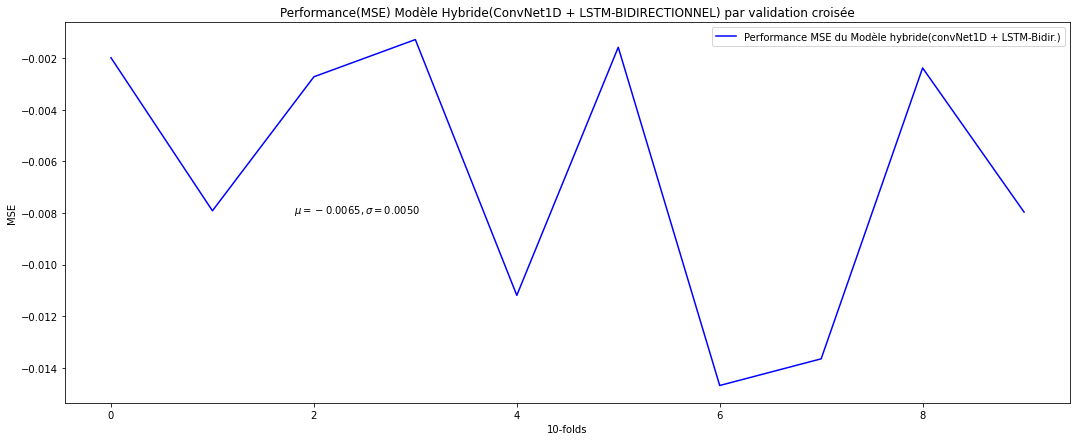

In [23]:
# Graphique des performances du modèle par validation croisée
plt.figure(figsize=(18,7))
plt.plot(precision, color = 'blue',
         label = 'Performance MSE du Modèle hybride(convNet1D + LSTM-Bidir.)')
plt.text(1.8,-0.008,'$\mu=%.4f,\\sigma=%.4f$'%(precision.mean(),precision.std()))
plt.title('Performance(MSE) Modèle Hybride(ConvNet1D + LSTM-BIDIRECTIONNEL) par validation croisée')
plt.xlabel('10-folds')
plt.ylabel('MSE')
plt.legend()
plt.show()